# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

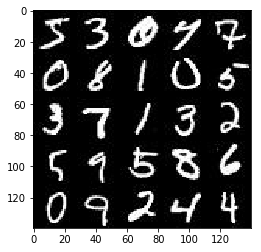

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

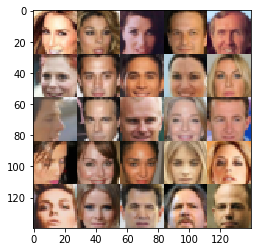

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.11.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_images")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    lr = tf.placeholder(tf.float32, (None), name="learning_rate")
    
    return input_images, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha_relu = 0.2
    with tf.variable_scope("discriminator", reuse=reuse):
        #input layer 28x28x3
        x1 = tf.layers.conv2d(images, 64, 4, strides=2, padding='same',
                             kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        relu1 = tf.maximum(alpha_relu * x1, x1)
        # output 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 4, strides=2, padding='same',
                             kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        relu2 = tf.maximum(alpha_relu * x2, x2)
        #output 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 4, strides=2, padding='same',
                             kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        relu3 = tf.maximum(alpha_relu * x3, x3)
        #output 4x4x256
        
        x4 = tf.layers.conv2d(relu3, 512, 4, strides=1, padding='same',
                             kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        relu4 = tf.maximum(alpha_relu * x4, x4)
        #output 4x4x512
        
        flattten = tf.reshape(relu4, (-1, 4*4*512))
        logits = tf.layers.dense(flattten, 1, kernel_initializer= tf.contrib.layers.xavier_initializer())
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha_relu = 0.2
    drop_value = 0.5
    with tf.variable_scope("generator", reuse= not is_train):
        # fully connected layer 
        x1 = tf.layers.dense(z, 4*4*512, kernel_initializer=tf.contrib.layers.xavier_initializer())
        # convolution stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.layers.dropout(x1, rate=drop_value)
        x1 = tf.maximum(alpha_relu * x1, x1)
        # output 4x4x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid', 
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.layers.dropout(x2, rate=drop_value)
        x2 = tf.maximum(alpha_relu * x2, x2)
        # output 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding='same',
                                       kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.layers.dropout(x3, rate=drop_value)
        x3 = tf.maximum(alpha_relu * x3, x3)
        # output 14x14x128
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        #output 28x28xout_channel_dim
        
        output = tf.tanh(logits)
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    smooth = 0.1
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * (1 - smooth))
    )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake))
    )
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                labels=tf.ones_like(d_model_fake) * (1 - smooth))
    )
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    inputs_real, inputs_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[-1])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z, lr:learning_rate})

                if steps % 100 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 200 == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)

                   

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.4340... Generator Loss: 0.6193
Epoch 1/2... Discriminator Loss: 1.3724... Generator Loss: 0.8620


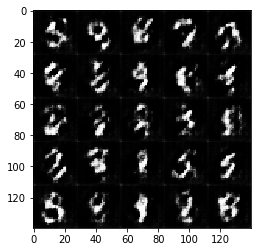

Epoch 1/2... Discriminator Loss: 1.4279... Generator Loss: 0.5711
Epoch 1/2... Discriminator Loss: 1.5261... Generator Loss: 0.6096


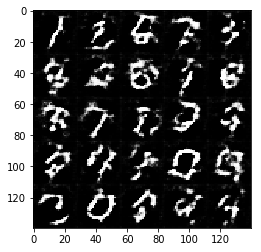

Epoch 1/2... Discriminator Loss: 1.3238... Generator Loss: 0.6625
Epoch 1/2... Discriminator Loss: 1.4721... Generator Loss: 0.6440


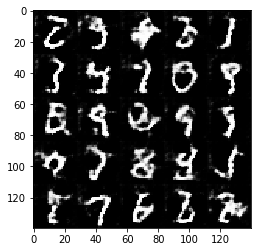

Epoch 1/2... Discriminator Loss: 1.3815... Generator Loss: 0.6192
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 0.8917


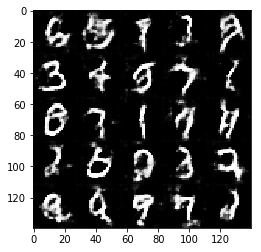

Epoch 1/2... Discriminator Loss: 1.1833... Generator Loss: 0.8348
Epoch 1/2... Discriminator Loss: 1.2321... Generator Loss: 0.7858


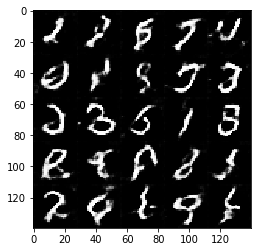

Epoch 1/2... Discriminator Loss: 1.2227... Generator Loss: 0.6707
Epoch 1/2... Discriminator Loss: 1.4267... Generator Loss: 0.6293


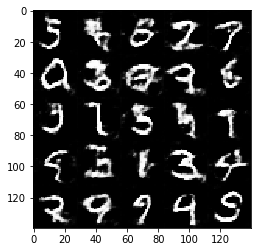

Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 0.8659
Epoch 1/2... Discriminator Loss: 0.9661... Generator Loss: 1.0685


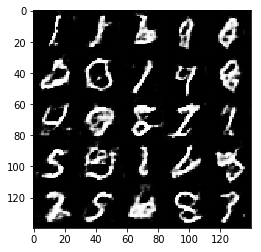

Epoch 1/2... Discriminator Loss: 1.1374... Generator Loss: 0.7979
Epoch 1/2... Discriminator Loss: 1.0706... Generator Loss: 0.9471


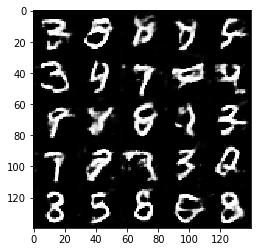

Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 0.7933
Epoch 1/2... Discriminator Loss: 1.4956... Generator Loss: 0.5128


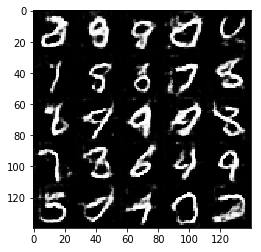

Epoch 1/2... Discriminator Loss: 1.2564... Generator Loss: 0.6950
Epoch 1/2... Discriminator Loss: 1.1163... Generator Loss: 0.7980


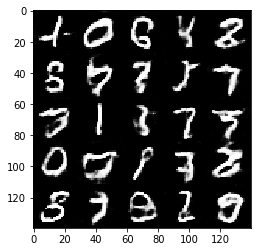

Epoch 1/2... Discriminator Loss: 0.8271... Generator Loss: 1.1956
Epoch 1/2... Discriminator Loss: 0.9424... Generator Loss: 0.9697


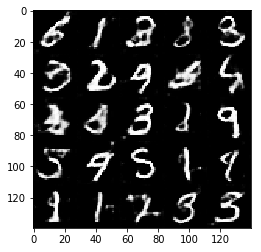

Epoch 1/2... Discriminator Loss: 1.2877... Generator Loss: 0.6979
Epoch 1/2... Discriminator Loss: 0.7536... Generator Loss: 1.5774


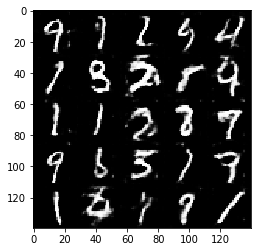

Epoch 1/2... Discriminator Loss: 0.9292... Generator Loss: 1.2656
Epoch 1/2... Discriminator Loss: 1.0309... Generator Loss: 0.8549


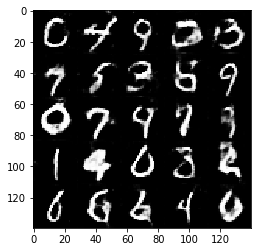

Epoch 1/2... Discriminator Loss: 0.8791... Generator Loss: 1.2323
Epoch 1/2... Discriminator Loss: 1.1421... Generator Loss: 0.8078


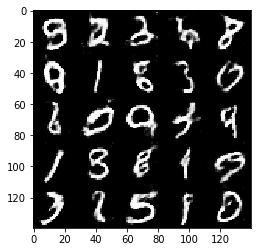

Epoch 1/2... Discriminator Loss: 0.8657... Generator Loss: 1.1862
Epoch 1/2... Discriminator Loss: 1.1749... Generator Loss: 0.7350


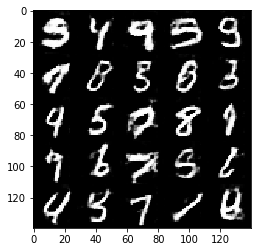

Epoch 1/2... Discriminator Loss: 1.4856... Generator Loss: 0.5446
Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 0.7239


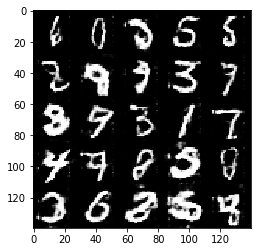

Epoch 1/2... Discriminator Loss: 0.8006... Generator Loss: 1.1940
Epoch 1/2... Discriminator Loss: 0.8347... Generator Loss: 1.0756


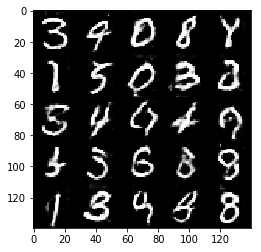

Epoch 1/2... Discriminator Loss: 1.0707... Generator Loss: 0.8010
Epoch 1/2... Discriminator Loss: 0.8106... Generator Loss: 1.1350


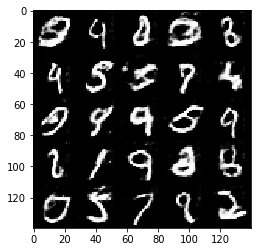

Epoch 1/2... Discriminator Loss: 1.0529... Generator Loss: 1.1804
Epoch 2/2... Discriminator Loss: 1.1583... Generator Loss: 0.7199


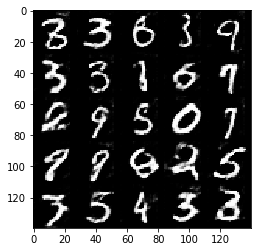

Epoch 2/2... Discriminator Loss: 0.8576... Generator Loss: 1.1828
Epoch 2/2... Discriminator Loss: 1.5699... Generator Loss: 0.5185


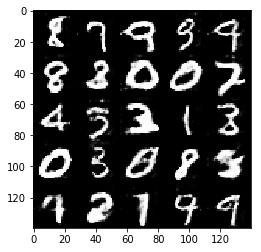

Epoch 2/2... Discriminator Loss: 0.6987... Generator Loss: 1.3838
Epoch 2/2... Discriminator Loss: 0.8278... Generator Loss: 1.3399


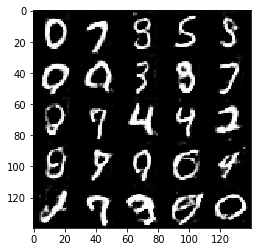

Epoch 2/2... Discriminator Loss: 0.9562... Generator Loss: 1.0353
Epoch 2/2... Discriminator Loss: 0.8311... Generator Loss: 1.0649


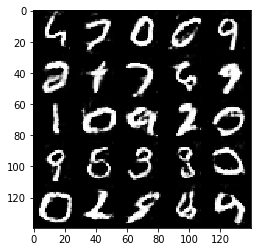

Epoch 2/2... Discriminator Loss: 0.8395... Generator Loss: 1.2837
Epoch 2/2... Discriminator Loss: 0.9889... Generator Loss: 1.0445


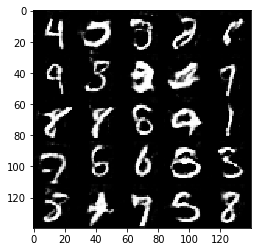

Epoch 2/2... Discriminator Loss: 0.8727... Generator Loss: 1.2448
Epoch 2/2... Discriminator Loss: 0.8366... Generator Loss: 1.0767


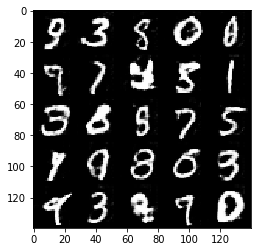

Epoch 2/2... Discriminator Loss: 1.0404... Generator Loss: 0.8062
Epoch 2/2... Discriminator Loss: 0.9917... Generator Loss: 1.1573


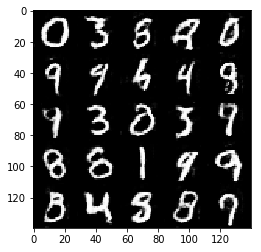

Epoch 2/2... Discriminator Loss: 0.5998... Generator Loss: 1.7293
Epoch 2/2... Discriminator Loss: 0.7789... Generator Loss: 1.0613


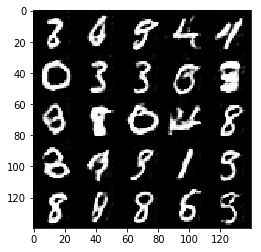

Epoch 2/2... Discriminator Loss: 1.0770... Generator Loss: 0.8277
Epoch 2/2... Discriminator Loss: 0.8250... Generator Loss: 1.5949


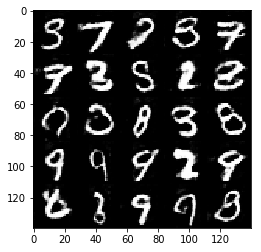

Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 1.4469
Epoch 2/2... Discriminator Loss: 0.7483... Generator Loss: 1.3992


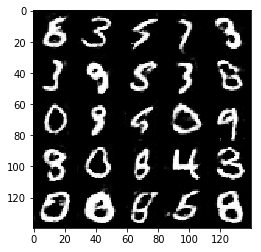

Epoch 2/2... Discriminator Loss: 0.7133... Generator Loss: 1.8712
Epoch 2/2... Discriminator Loss: 0.9152... Generator Loss: 1.6916


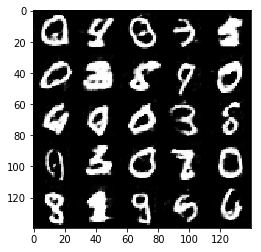

Epoch 2/2... Discriminator Loss: 0.6837... Generator Loss: 1.4834
Epoch 2/2... Discriminator Loss: 0.8449... Generator Loss: 1.1333


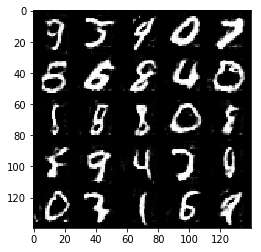

Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.5143
Epoch 2/2... Discriminator Loss: 0.7944... Generator Loss: 1.5019


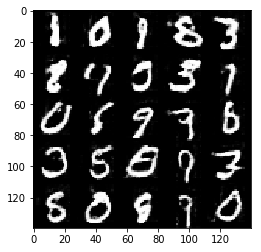

Epoch 2/2... Discriminator Loss: 0.8336... Generator Loss: 1.2630
Epoch 2/2... Discriminator Loss: 0.7925... Generator Loss: 1.3633


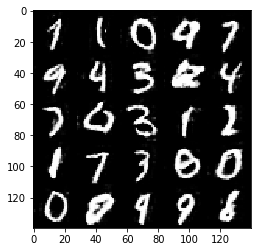

Epoch 2/2... Discriminator Loss: 0.8519... Generator Loss: 1.1504
Epoch 2/2... Discriminator Loss: 1.2025... Generator Loss: 0.9105


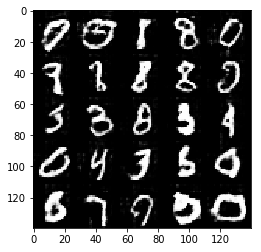

Epoch 2/2... Discriminator Loss: 0.9611... Generator Loss: 1.0253
Epoch 2/2... Discriminator Loss: 0.7469... Generator Loss: 1.4061


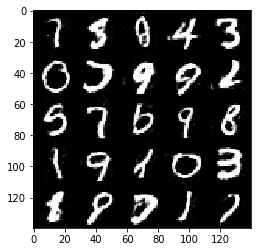

Epoch 2/2... Discriminator Loss: 1.1328... Generator Loss: 0.8045
Epoch 2/2... Discriminator Loss: 0.5710... Generator Loss: 2.1346


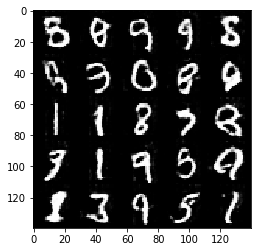

Epoch 2/2... Discriminator Loss: 0.7012... Generator Loss: 1.4025
Epoch 2/2... Discriminator Loss: 0.6936... Generator Loss: 1.5604


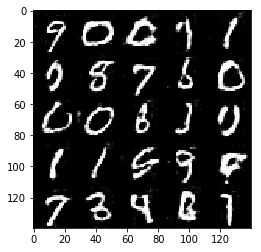

Epoch 2/2... Discriminator Loss: 0.6218... Generator Loss: 1.5424
Epoch 2/2... Discriminator Loss: 0.8464... Generator Loss: 1.1966


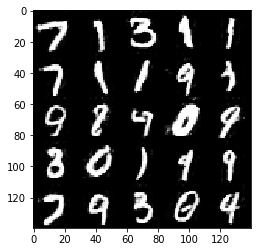

Epoch 2/2... Discriminator Loss: 0.7949... Generator Loss: 1.5259


In [16]:
batch_size = 16
z_dim = 128
learning_rate = 0.0003
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 1.1243


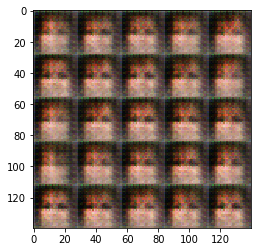

Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 1.0600
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.9316


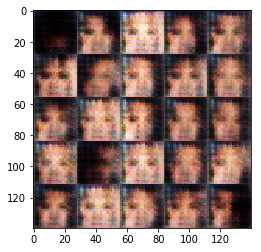

Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 0.9778
Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 0.8483


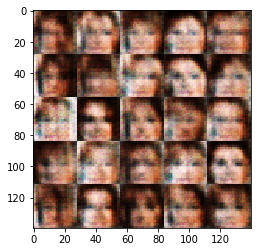

Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.7268


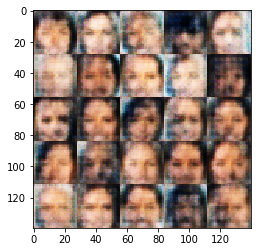

Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.8159
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.8112


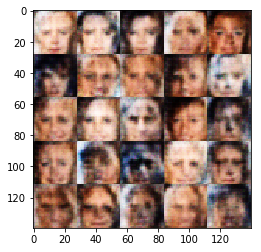

Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.7928


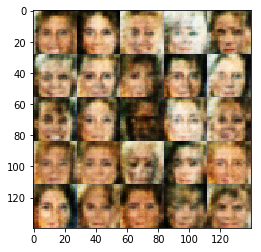

Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.8148
Epoch 1/1... Discriminator Loss: 1.1619... Generator Loss: 0.8267


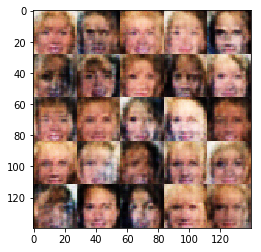

Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.7212
Epoch 1/1... Discriminator Loss: 1.3657... Generator Loss: 0.6682


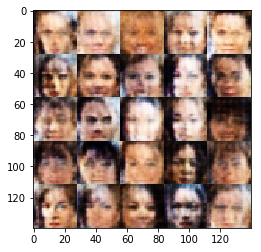

Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 1.2333... Generator Loss: 0.7941


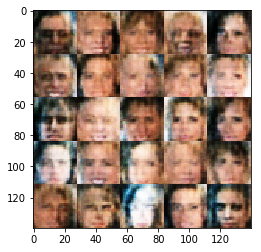

Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.7199
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.8534


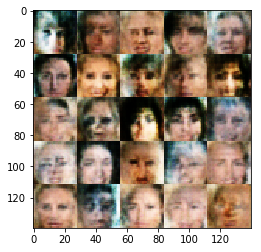

Epoch 1/1... Discriminator Loss: 1.2333... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.8127


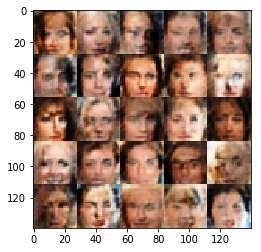

Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.3156... Generator Loss: 0.7927


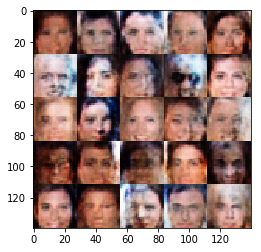

Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.8087


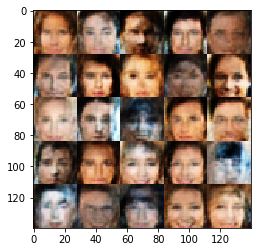

Epoch 1/1... Discriminator Loss: 1.3443... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.7057


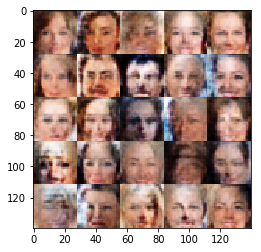

Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.8085
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.7661


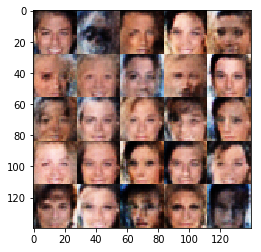

Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 0.7850


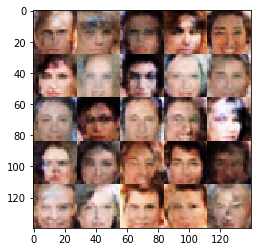

Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8160


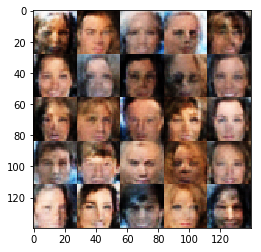

Epoch 1/1... Discriminator Loss: 1.2766... Generator Loss: 0.7790
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.8334


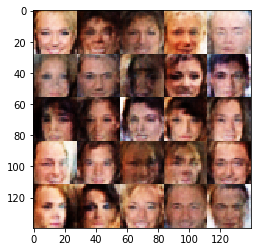

Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.9483


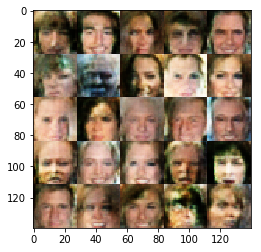

Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.8470


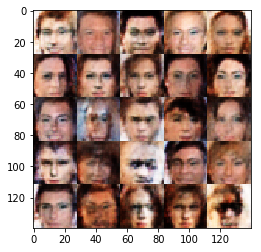

Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.7415


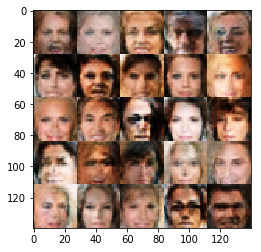

Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.7408


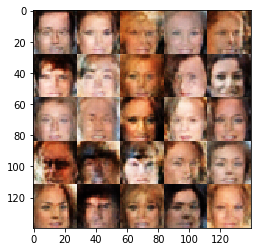

Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.7484


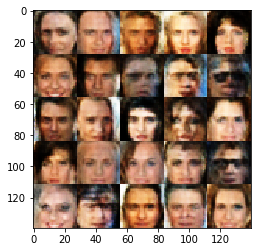

Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.7484
Epoch 1/1... Discriminator Loss: 1.1489... Generator Loss: 0.8270


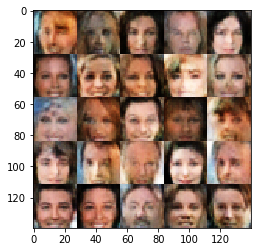

Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.7591


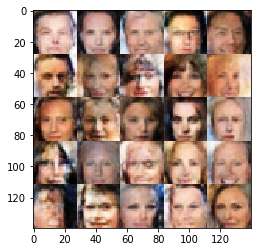

Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.7829
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.7355


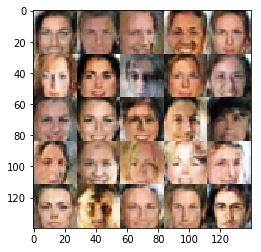

Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.1868... Generator Loss: 0.7992


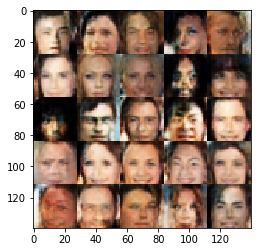

Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 0.9387
Epoch 1/1... Discriminator Loss: 1.2863... Generator Loss: 0.7633


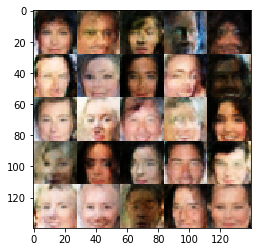

Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.7484


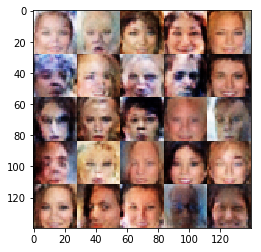

Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.7946
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 0.7736


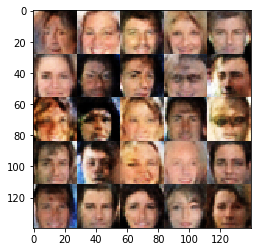

Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.7398
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.8186


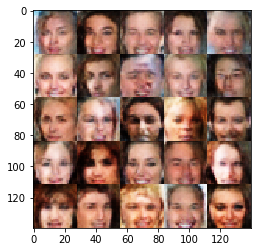

Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.7893


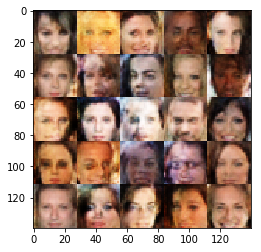

Epoch 1/1... Discriminator Loss: 1.2700... Generator Loss: 0.7555
Epoch 1/1... Discriminator Loss: 1.0961... Generator Loss: 0.8657


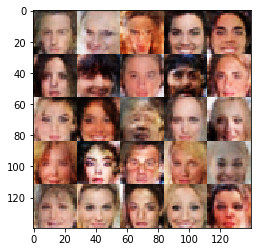

Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.4657... Generator Loss: 0.7115


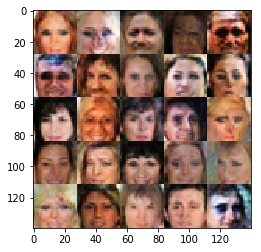

Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.7864


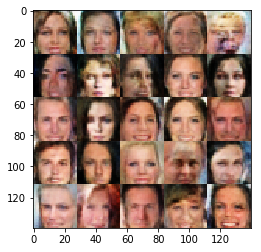

Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.2171... Generator Loss: 0.8412


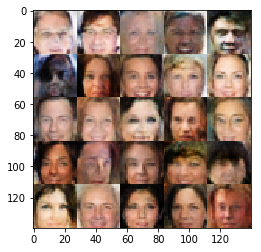

Epoch 1/1... Discriminator Loss: 1.2255... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.1527... Generator Loss: 0.9011


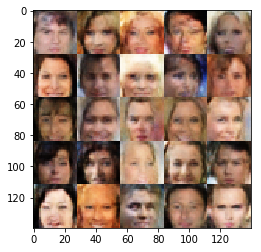

Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.7783
Epoch 1/1... Discriminator Loss: 1.2198... Generator Loss: 0.8607


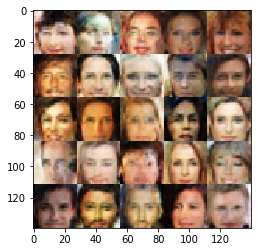

Epoch 1/1... Discriminator Loss: 1.2491... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 0.7379


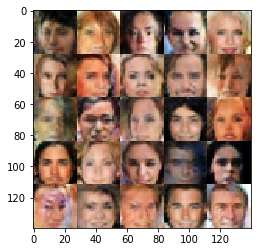

Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 1.0964... Generator Loss: 0.9198


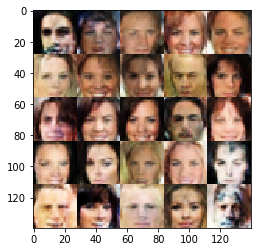

Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.2238... Generator Loss: 0.7103


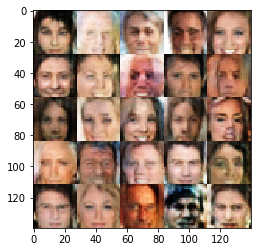

Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.8378


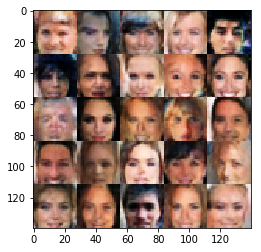

Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.6877


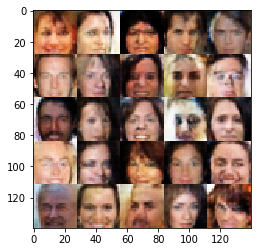

Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.8122


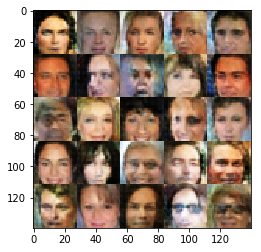

Epoch 1/1... Discriminator Loss: 1.1757... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 1.2263... Generator Loss: 0.7554


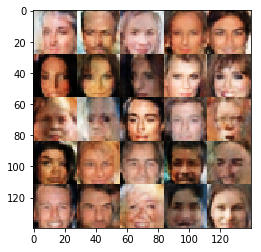

Epoch 1/1... Discriminator Loss: 1.1004... Generator Loss: 0.9063
Epoch 1/1... Discriminator Loss: 1.2600... Generator Loss: 0.8456


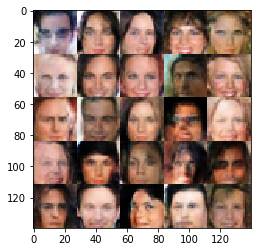

Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.9263
Epoch 1/1... Discriminator Loss: 1.2620... Generator Loss: 0.8077


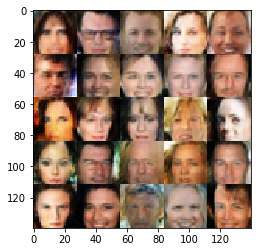

Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.2084... Generator Loss: 0.7982


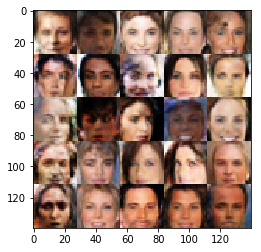

Epoch 1/1... Discriminator Loss: 1.1548... Generator Loss: 0.8537
Epoch 1/1... Discriminator Loss: 1.2690... Generator Loss: 0.7421


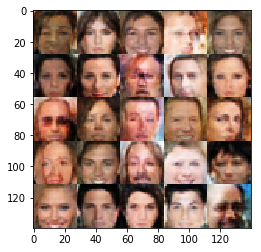

Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 0.9276


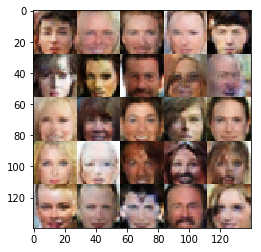

Epoch 1/1... Discriminator Loss: 1.1307... Generator Loss: 0.7744
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.6613


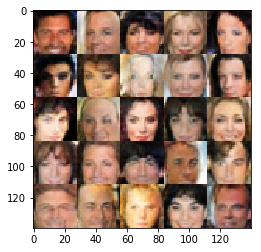

Epoch 1/1... Discriminator Loss: 1.2905... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 0.8512


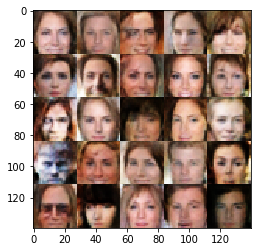

Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 0.9567
Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 0.8086


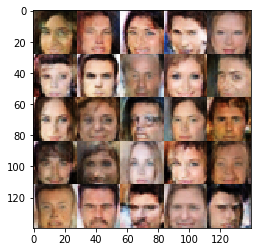

Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.8983


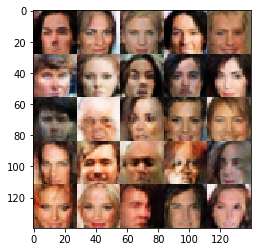

Epoch 1/1... Discriminator Loss: 1.2063... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 0.7296


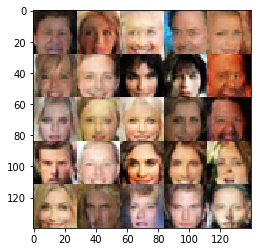

Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 0.7768


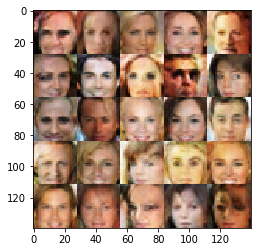

Epoch 1/1... Discriminator Loss: 1.0321... Generator Loss: 1.0489
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 0.9498


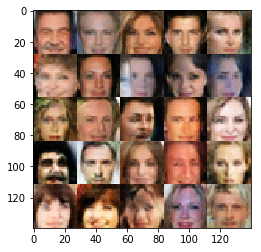

Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 0.8591
Epoch 1/1... Discriminator Loss: 1.2120... Generator Loss: 0.8207


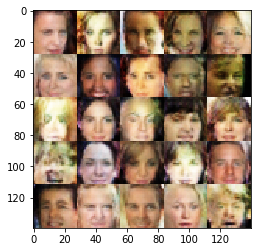

Epoch 1/1... Discriminator Loss: 1.1502... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 1.2717... Generator Loss: 0.7557


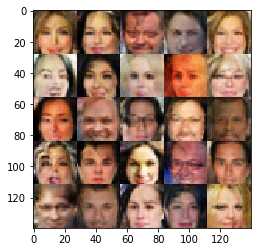

Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.6991


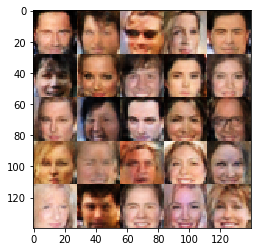

Epoch 1/1... Discriminator Loss: 1.1126... Generator Loss: 1.0248
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.7650


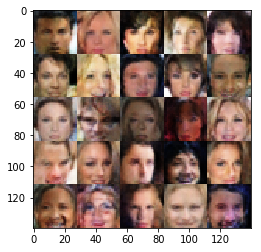

Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.8220
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.8379


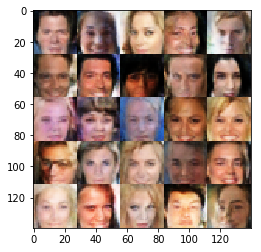

Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 0.7936


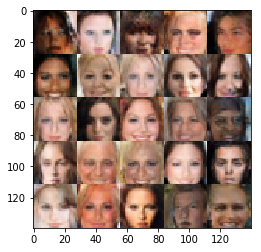

In [17]:
batch_size = 16
z_dim = 128
learning_rate = 0.0002
beta1 = 0.3 #0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.